Demo: generate two three-dimensional Gaussian distributions, one from $\mu=(1,1,1)$, another one from $\mu=(3,3,3)$, then use t-SNE to project data points to two-dimension, to see if data points are separated. 

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
from plot_functions import adjustAxeProperties

In [2]:
n1 = 150
mu1 = np.array([1.0, 1.0, 1.0])
cov1 = np.eye(3)
X1 = np.random.multivariate_normal(mean=mu1, cov=cov1, size=n1)
y1 = np.array([0] * n1)

n2 = 100
mu2 = np.array([3.0, 3.0, 3.0])
cov2 = np.eye(3)
X2 = np.random.multivariate_normal(mean=mu2, cov=cov2, size=n2)
y2 = np.array([1] * n2)


In [3]:
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)
n = n1 + n2

In [4]:
model = TSNE(n_components=2, verbose=1, perplexity=20, learning_rate=15, n_iter=5000)
X_red = model.fit_transform(X)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.000s...
[t-SNE] Computed neighbors for 250 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 0.721910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.196400
[t-SNE] Error after 2900 iterations: 0.571500


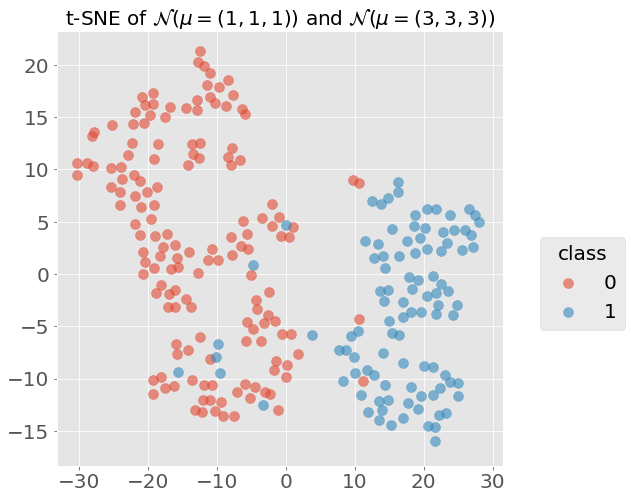

In [5]:
FONTSIZE = 20
fig, ax = plt.subplots(1, figsize=(8, 8))

for c in range(2):
    class_idx = np.arange(n)[y == c]
    X_this_class = X_red[class_idx, :]
    ax.scatter(X_this_class[:, 0], X_this_class[:, 1], s=100, alpha=0.6, label=c)

l = ax.legend(fontsize=FONTSIZE,title='class', bbox_to_anchor=(1.06, 0.55)) 
plt.setp(l.get_title(),fontsize=FONTSIZE)
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
_ = ax.set_title(r't-SNE of $\mathcal{N}(\mu=(1,1,1))$ and $\mathcal{N}(\mu=(3,3,3))$', fontsize=FONTSIZE)